In [41]:
from utils import *
import ipywidgets as widgets
import os
import pickle

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Plot a Single Result

In [87]:
directories = [dir for dir in os.listdir("./") if ("FedDC" in dir or "RadonOnly" in dir) and not "." in dir]
exp_path = directories[0]

w = widgets.Dropdown(
    options=directories,
    value=directories[0],
    description='Experiment folder:',
    disabled=False,
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global exp_path
        exp_path = change['new']

w.observe(on_change)
display(w)


Dropdown(description='Experiment folder:', options=('FedDC_2021-09-08_04-40-13_paper', 'RadonOnly_2021-09-08_0…

In [88]:
print("Loading ",exp_path," ...")
trainACCs = pickle.load(open(os.path.join(exp_path, "trainACC.pck"), 'rb'))
testACCs = pickle.load(open(os.path.join(exp_path, "testACC.pck"), 'rb'))
exptype = "FedDC" if "FedDC" in exp_path else "RadonOnly"

Loading  FedDC_2021-09-08_04-40-13_paper  ...


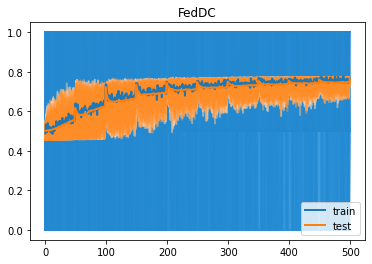

In [89]:
plotResults(trainACCs, testACCs, exptype, exp_path, bSave = False)

# Compare two Results

In [92]:
exp_path1 = directories[0]
exp_path2 = directories[1]

w1 = widgets.Dropdown(
    options=directories,
    value=directories[0],
    description='Exp 1:',
    disabled=False,
)

w2 = widgets.Dropdown(
    options=directories,
    value=directories[1],
    description='Exp 2:',
    disabled=False,
)

def on_change1(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global exp_path1
        exp_path1 = change['new']
def on_change2(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global exp_path2
        exp_path2 = change['new']
w1.observe(on_change1)
w2.observe(on_change2)
display(w1)
display(w2)

Dropdown(description='Exp 1:', options=('FedDC_2021-09-08_04-40-13_paper', 'RadonOnly_2021-09-08_04-40-20_pape…

Dropdown(description='Exp 2:', index=1, options=('FedDC_2021-09-08_04-40-13_paper', 'RadonOnly_2021-09-08_04-4…

In [93]:
trainACCs1 = pickle.load(open(os.path.join(exp_path1, "trainACC.pck"), 'rb'))
testACCs1 = pickle.load(open(os.path.join(exp_path1, "testACC.pck"), 'rb'))
exptype1 = "FedDC" if "FedDC" in exp_path1 else "RadonOnly"

trainACCs2 = pickle.load(open(os.path.join(exp_path2, "trainACC.pck"), 'rb'))
testACCs2 = pickle.load(open(os.path.join(exp_path2, "testACC.pck"), 'rb'))
exptype2 = "FedDC" if "FedDC" in exp_path2 else "RadonOnly"

#trainACCs1 = trainACCs1[:300]
#testACCs1  = testACCs1[:300]
#trainACCs2 = trainACCs2[:300]
#testACCs2 = testACCs2[:300]

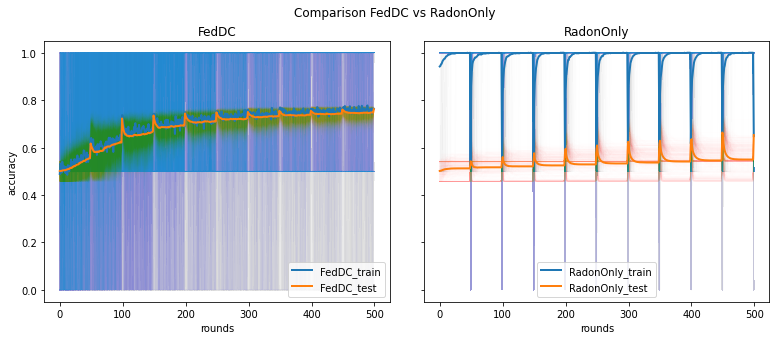

In [94]:
plotComparison(trainACCs1, testACCs1, trainACCs2, testACCs2, exptype1, exptype2, colors=None, alphas=[0.005,0.005], filename="comparison.png")

In [95]:
print(trainACCs1[-1][0])
print(trainACCs2[-1][0])
print(testACCs1[-1][0])
print(testACCs2[-1][0])

0.5
0.0
0.761998
0.653031


In [99]:
def writeToPGFdatafile(accs, name):
    outstr = "round avg"
    m = len(accs[0])
    for i in range(m):
        outstr += " client"+str(i)
    outstr += "\n"
    for r in range(len(accs)):
        outstr += str(r) + " " + str(np.mean(accs[r]))
        for i in range(m):
            outstr += " " + str(accs[r][i])
        outstr += "\n"
    f = open(name, 'w')
    f.write(outstr)
    f.close()

In [101]:
writeToPGFdatafile(trainACCs1, "feddc_trainaccs.txt")
writeToPGFdatafile(testACCs1, "feddc_testaccs.txt")
writeToPGFdatafile(trainACCs2, "radononly_trainaccs.txt")
writeToPGFdatafile(testACCs2, "radononly_testaccs.txt")

In [103]:
def writeToPGFdatafileConf(accs, name):
    outstr = "round avg lowquant highquant"
    outstr += "\n"
    for r in range(len(accs)):
        outstr += str(r) + " " + str(np.mean(accs[r])) + " " + str(np.quantile(accs[r], 0.1)) + " " + str(np.quantile(accs[r], 0.9))
        outstr += "\n"
    f = open(name, 'w')
    f.write(outstr)
    f.close()

In [105]:
writeToPGFdatafileConf(trainACCs1, "feddc_trainaccsconf.txt")
writeToPGFdatafileConf(testACCs1, "feddc_testaccsconf.txt")
writeToPGFdatafileConf(trainACCs2, "radononly_trainaccsconf.txt")
writeToPGFdatafileConf(testACCs2, "radononly_testaccsconf.txt")